## Adaptive Boosting

**Adaptive boosting or (AdaBoost)** is an ensemble method where the output of many "weak learners" is combined to give a final output. It's a stage-wise algorithm where subsequent stage weights are tweaked to correctly classify examples miss classified in previous stage. **AdaBoost** algorithm is as follows:
1. Set the weights w, to uniform weights, where $\sum_i w_i = 1$.
2. For iteration $j$ do the following:
    1. Train a weak learner: $C_j(X, y, w_j)$.
    2. Predict class labels: $\hat{y}_j = \text{predict}(C_j, X)$.
    3. Compute weighted error rate: $\epsilon = w_j * (\hat{y}_j \ne y_j)$.
    4. Compute coefficient: $\alpha_j = 0.5\text{log}\frac{1-\epsilon}{\epsilon}$.
    5. Update weights: $w_{j+1} = w_j * \text{exp}(-\alpha_j \times \hat{y}_j \times y)$.
    6. Normalize weights to sum to 1: $w_{j+1} = w_{j+1} / \sum_i{w_i}$.
3. Compute the final prediction: $\hat{y} = \left ( \sum_{j=1}^{m} (\alpha_j \times \hat{y}_j)  \right )$

In the notebook below we will implement adaptive boosting and compare it will sklearn implementation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Make the sheet width 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>" ))

In [2]:
#Load covtype dataset
from sklearn import datasets
wine_data = datasets.load_wine()
df_wine = pd.DataFrame(wine_data.data)
df_wine['target'] = pd.Series(wine_data.target)

In [3]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df_wine.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


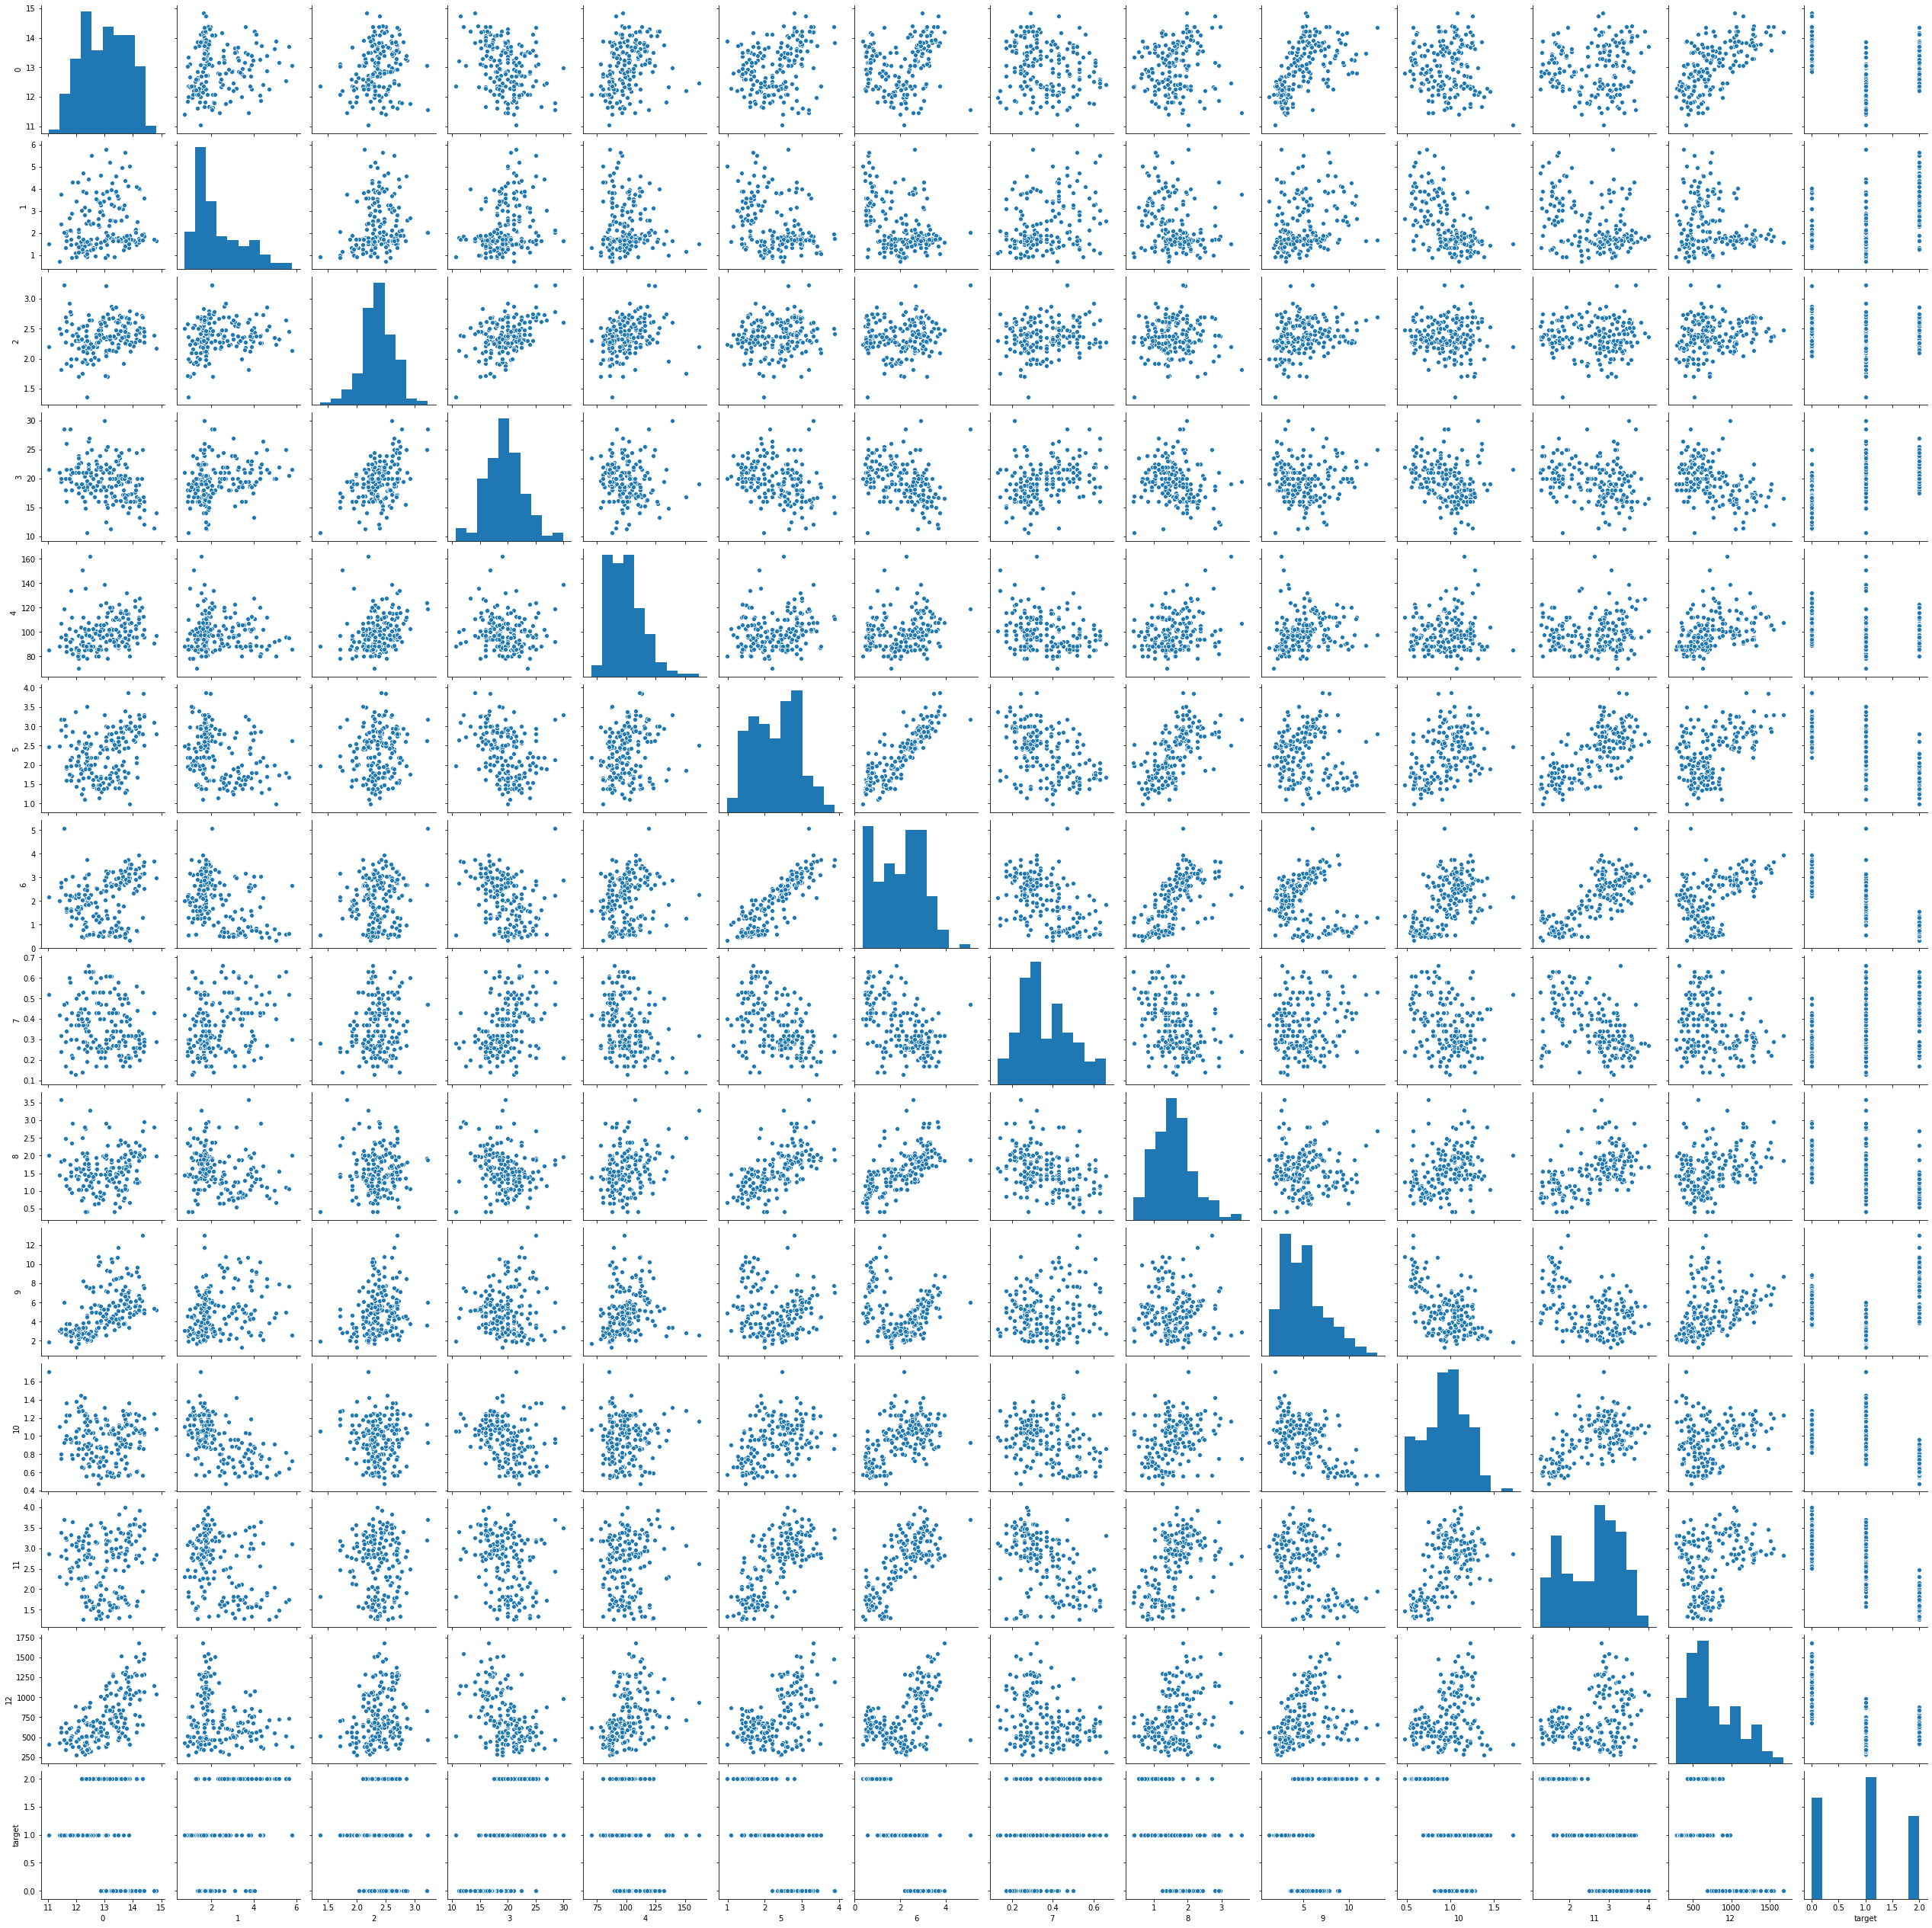

In [5]:
import seaborn as sns
sns.pairplot(df_wine)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_wine.drop('target', axis=1), df_wine['target'].values, test_size=0.10, random_state=1)

print(f"Size of test set = {y_test.shape[0]}")
print(f"Size of train set = {y_train.shape[0]}")

Size of test set = 18
Size of train set = 160


In [7]:
#Lets first standardize the X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [8]:
#Now lets fit multinomial logistic to the data
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1)
clf.fit(X_train_std, y_train)
print(f"Train score={clf.score(X_train_std, y_train):.3}")
print(f"Test score={clf.score(X_test_std, y_test):.3}")

Train score=1.0
Test score=1.0


In [9]:
#Now lets apply decision tree model
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=50)
clf = clf.fit(X_train_std, y_train)
print(f"Train score={clf.score(X_train_std, y_train):.3}")
print(f"Test score={clf.score(X_test_std, y_test):.3}")

Train score=0.944
Test score=0.944


In [10]:
#Now lets fit random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, min_samples_split=2)
clf.fit(X_train_std, y_train)
print(f"Train score={clf.score(X_train_std, y_train):.3}")
print(f"Test score={clf.score(X_test_std, y_test):.3}")

Train score=1.0
Test score=1.0


In [11]:
#Now lets fit AdaBoost
from sklearn.ensemble import AdaBoostClassifier
base_clf = tree.DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(base_estimator=base_clf, 
                         n_estimators=10, random_state=1)
clf.fit(X_train_std, y_train)
print(f"Train score={clf.score(X_train_std, y_train):.3}")
print(f"Test score={clf.score(X_test_std, y_test):.3}")

Train score=1.0
Test score=1.0


Text(0.5, 1.0, 'Train and test error as number of trees')

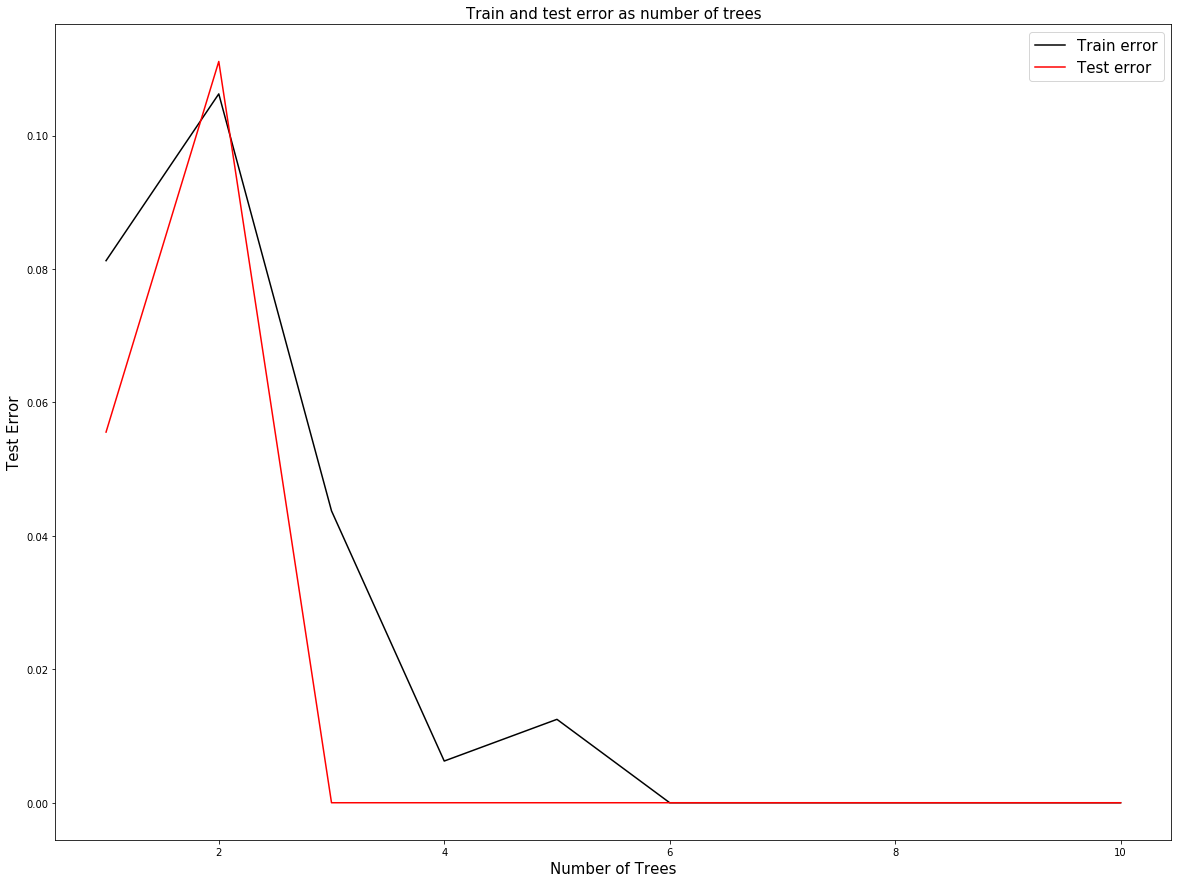

In [12]:
from sklearn.metrics import accuracy_score
test_errors = []
for test_predict in clf.staged_predict(X_test_std):
    test_errors.append(1. - accuracy_score(test_predict, y_test))
    
train_errors = []
for train_predict in clf.staged_predict(X_train_std):
    train_errors.append(1. - accuracy_score(train_predict, y_train))
    
n_trees = len(clf)
plt.figure(figsize=(20, 15))
plt.plot(range(1, n_trees + 1),
         train_errors, c='black', label='Train error')
plt.plot(range(1, n_trees + 1),
        test_errors, c='red', label='Test error')
plt.legend(fontsize=15)
plt.ylabel('Test Error', fontsize=15)
plt.xlabel('Number of Trees', fontsize=15)
plt.title('Train and test error as number of trees', fontsize=15)

#### Now lets implement SAMME.R by hand. That is the algorithm implemented in Sklearn. Algorithm is proposed in 
https://web.stanford.edu/~hastie/Papers/samme.pdf

In [13]:
from sklearn.metrics import accuracy_score
class SAMME:
    def __init__(self, n_estimators=10, min_samples_split=50):
        self.n_estimators = n_estimators
        self.min_samples_split = min_samples_split
    
    @staticmethod
    def __transformY(y):
        K = len(np.unique(y))
        a = -1/(K-1)
        Y = np.full((y.shape[0], K), a)
        for (ndx, yi) in enumerate(y):
            Y[ndx,yi] = 1
        return Y
    
    def fit(self, X, y):
        n = X.shape[0]
        w = np.full(n, 1.0/n)
        self.K = len(np.unique(y))
        Y = SAMME.__transformY(y)
        b = -(self.K-1)/self.K
        self.trees = list()
        for i in range(self.n_estimators):
            #print(f"Fitting tree {i+1}")
            clf = tree.DecisionTreeClassifier(min_samples_split=self.min_samples_split)
            #Fit the decision tree with weights
            clf.fit(X,y,w)
            #Obtain the class probability estimates
            prob_a = clf.predict_proba(X)
            #If probability is zero replace by a very small number
            prob_a = np.where(prob_a > 0, prob_a, 1e-5)
            #Normalize probabilities again
            prob_a = prob_a / np.sum(prob_a, axis=1, keepdims=True)
            log_prob_a = np.log(prob_a)
            #Save the tree
            self.trees.append(clf)
            #Update the weights
            for ndx in range(len(w)):
                w[ndx] *= np.exp(b*np.matmul(Y[ndx,:], log_prob_a[ndx,:].T))
            #Renormalize weights
            wsum = np.sum(w)
            w /= wsum
    
    def __predict(self, x):
        h = np.zeros((1, self.K))
        for t in self.trees:
            #Get the class probability estimates
            prob_a = t.predict_proba(x.reshape(x.shape[0],1).T)
            #Replace zero with a small number
            prob_a = np.where(prob_a > 0, prob_a, 1e-5)
            #Take log 
            log_prob_a = np.log(prob_a)
            sum_log_prob_a = np.sum(log_prob_a)
            sum_log_prob_a /= self.K
            #Compute h
            h += (self.K-1)*(np.log(prob_a) - sum_log_prob_a)
        return np.argmax(h) 
    
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for ndx in range(0, X.shape[0]):
            y_pred[ndx] = self.__predict(X[ndx,:])
        return y_pred
             
    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y_pred, y)
        

In [14]:
clf = SAMME()
clf.fit(X_train_std, y_train)
print(f"Train score={clf.score(X_train_std, y_train):.3}")
print(f"Test score={clf.score(X_test_std, y_test):.3}")

Train score=1.0
Test score=1.0


#### Our method matches one in sklearn!!!